In [64]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import umap
import umap.plot

#%matplotlib inline

#%matplotlib notebook

#from mpl_toolkits import mplot3d
#import matplotlib.pyplot as plt
#import mpld3
#mpld3.enable_notebook()

%matplotlib notebook

from mpl_toolkits import mplot3d 
import matplotlib.pyplot as plt
import mpld3
#mpld3.enable_notebook()

In [3]:
paths = [
    "./isomap_o_dim5.csv",
    "./pivot_o.csv"
]

In [4]:
dataset = np.genfromtxt(paths[0], delimiter=';')

In [5]:
dataset.shape

(14098, 5)

In [6]:
color_info = pd.read_csv(paths[1], delimiter = ';', low_memory=False)

In [7]:
color_info

,Unnamed: 0,o__,o__Acidimicrobiales,o__Acidobacteriales,o__Actinomycetales,o__Aeromonadales,o__Alteromonadales,o__Anaeroplasmatales,o__Aquificales,o__Bacillales,...,o__SBla14,o__Sphaerochaetales,o__Spirobacillales,o__Sva0725,o__Thermoanaerobacterales,o__Thermogemmatisporales,o__Thiohalorhabdales,o__YLA114,o__Z20,o__mle1-48
0,10317.000052344,0.0,0.0,0.0,0.001334,0.0,0.0,0.0,0.0,0.000140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10317.000052366,0.0,0.0,0.0,0.007542,0.0,0.0,0.0,0.0,0.001019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10317.000052369,0.0,0.0,0.0,0.000838,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10317.00005237,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10317.000052372,0.0,0.0,0.0,0.000693,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14093,MSM5LLIO,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14094,MSM5LLIQ,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14095,MSM5ZOJY,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14096,MSM633FF,0.0,0.0,0.0,0.000930,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
color_info.insert(1, "color", True)

In [44]:
color_info["color"] = color_info["Unnamed: 0"]

In [45]:
def check(name) :
    if (name.startswith("103")) :
        return 'b' # 'AGP'
    elif (name.startswith("EP")) :
        return 'r' # 'PTB'
    elif (name.startswith("HMP2_") or (name.startswith("otu"))) :
        return 'g' # 'T2D'
    else :
        return 'y' # 'IBD'

In [46]:
color_info["color"] = color_info["color"].apply(check)

In [47]:
# Check that the databases are marked properly

color_info["color"].value_counts()

b    9511
r    3457
g    1044
y      86
Name: color, dtype: int64

In [59]:
embedding = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.0, spread = 1.5, metric='euclidean').fit(dataset)

In [57]:
embedding.embedding_

array([[-1.9475224 , -0.48137346],
       [10.080491  , -5.4022617 ],
       [17.858002  , -3.0925722 ],
       ...,
       [15.36834   ,  5.0672245 ],
       [-0.99407876,  0.9498519 ],
       [13.603983  , -3.0896268 ]], dtype=float32)

In [58]:
np.savetxt("umap_o_dim2_nn20.csv", embedding.embedding_, delimiter=";")

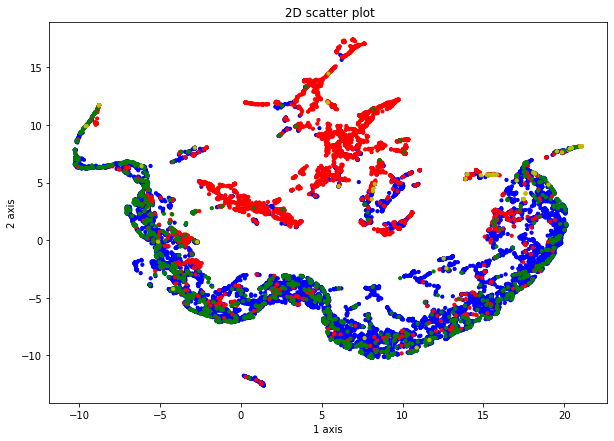

In [54]:
# parameters are: n_neighbors=15, n_components=2, min_dist=0.0, spread = 1.5, metric='euclidean'

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="rectilinear")

ax.scatter(embedding.embedding_[:, 0], embedding.embedding_[:, 1], color = color_info["color"], s = 10)
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


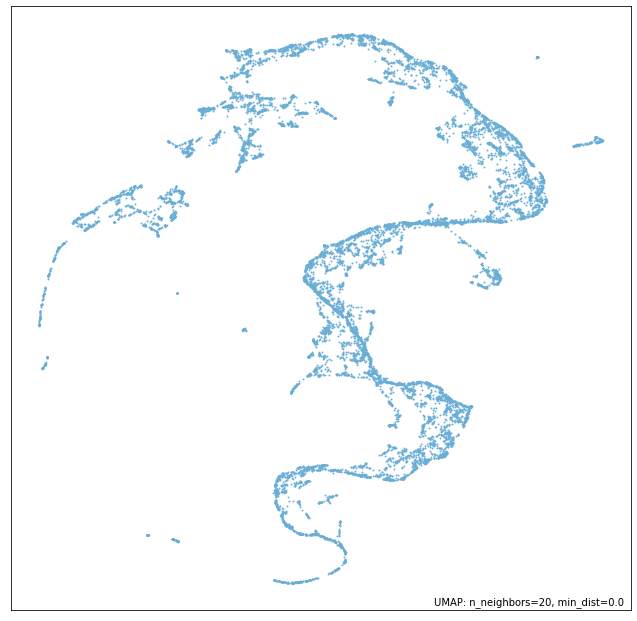

In [35]:
umap.plot.points(embedding)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


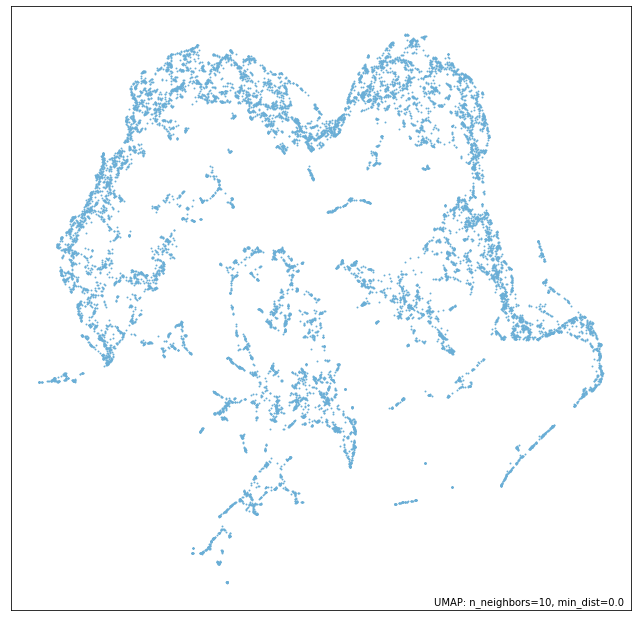

In [12]:
# recalculated
umap.plot.points(embedding)

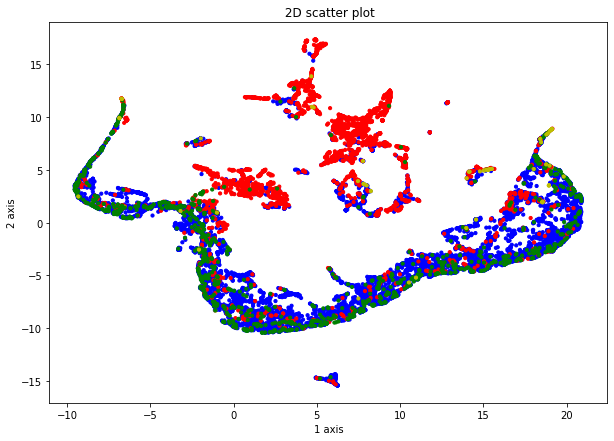

In [56]:
# parameters are: n_neighbors=20, n_components=2, min_dist=0.0, spread = 1.5, metric='euclidean'

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="rectilinear")

ax.scatter(embedding.embedding_[:, 0], embedding.embedding_[:, 1], color = color_info["color"], s = 10)
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
plt.show()

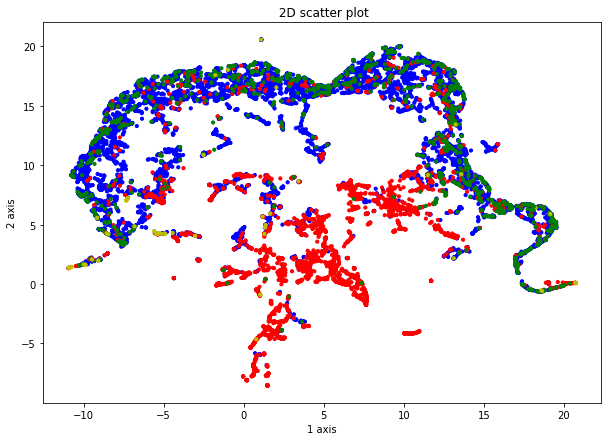

In [61]:
# parameters are: n_neighbors=10, n_components=2, min_dist=0.0, spread = 1.5, metric='euclidean'

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="rectilinear")

ax.scatter(embedding.embedding_[:, 0], embedding.embedding_[:, 1], color = color_info["color"], s = 10)
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


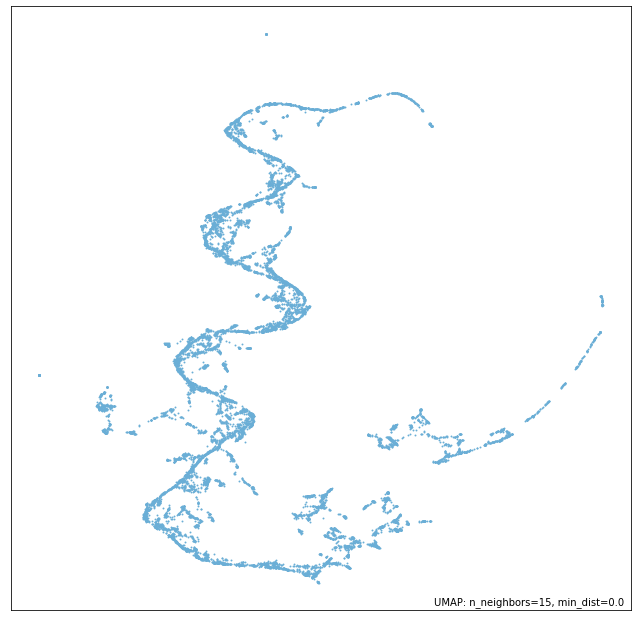

In [43]:
#spread = 0.5

umap.plot.points(embedding)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


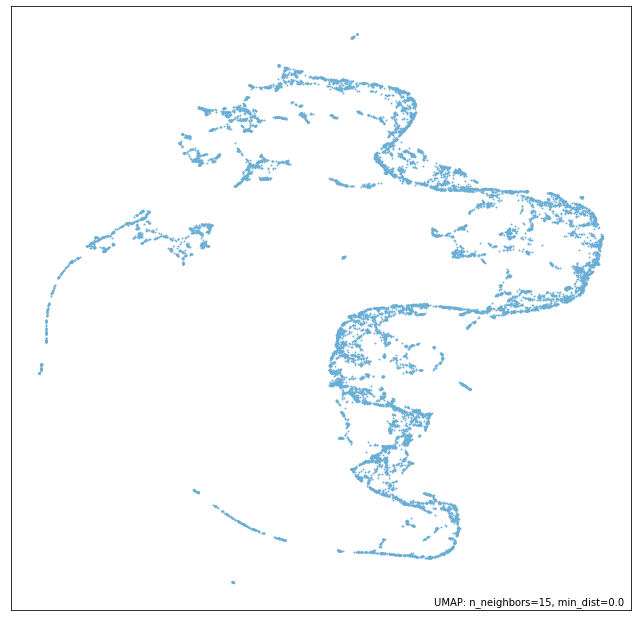

In [45]:
#spread = 0.75

umap.plot.points(embedding)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


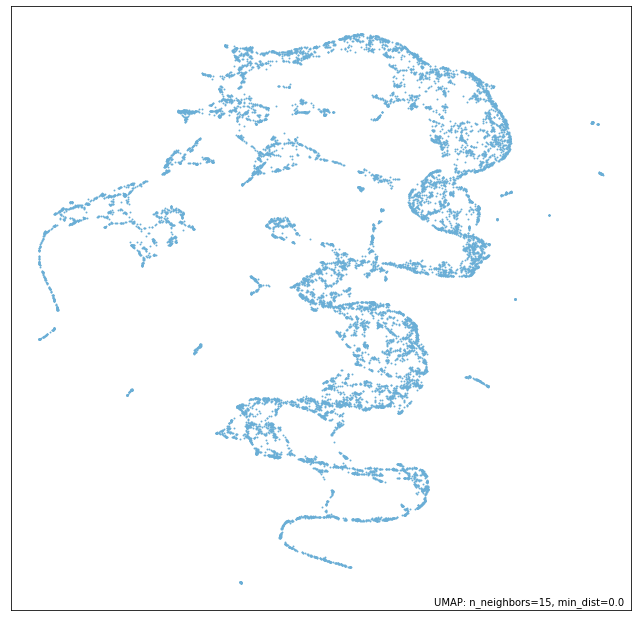

In [47]:
#spread = 1.5

umap.plot.points(embedding)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


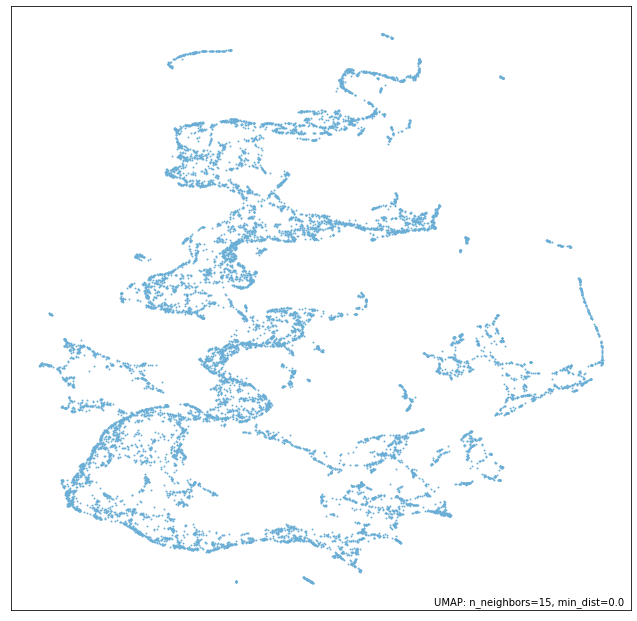

In [49]:
#spread = 2.0

umap.plot.points(embedding)

In [14]:
embedded = umap.UMAP(n_neighbors=30, n_components=3, min_dist=0.0, spread = 2.0, metric='euclidean').fit_transform(dataset)

In [15]:
embedded.shape

(14098, 3)

In [16]:
embedded

array([[14.764872 , 13.668665 ,  1.1993285],
       [-3.3601968, 13.992256 , -4.1152964],
       [-6.192214 , 14.0462475,  6.1613746],
       ...,
       [-2.0858893,  6.060504 , 11.5540695],
       [13.350081 , 11.637034 ,  2.2872865],
       [-4.481687 , 14.513518 ,  1.1431692]], dtype=float32)

In [36]:
np.savetxt("umap_o_dim3_nn30_sp2.csv", embedded, delimiter=";")

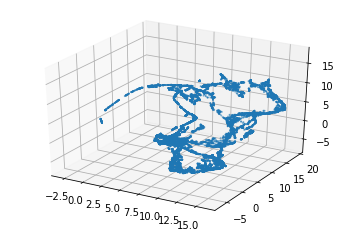

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedded[:,0], embedded[:,1], embedded[:,2], s=1, color = color_info["color"])
#plt.title(title, fontsize=18)

TypeError: 'UMAP' object is not subscriptable

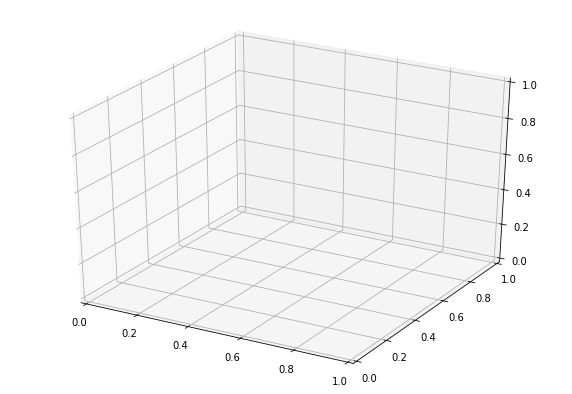

In [9]:
# n_neighbors=15,n_components=3, min_dist=0.0, spread = 1.5, metric='euclidean'

fig2 = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d")

ax.scatter3D(embedded[:, 0], embedded[:, 1], embedded[:, 2], color = "black")
plt.title(" 3D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
ax.set_zlabel('3 axis')
plt.show()

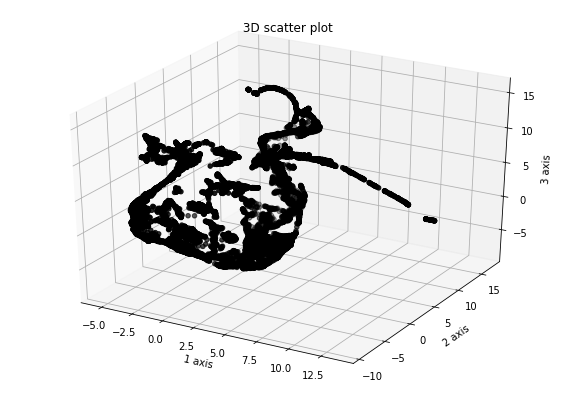

In [80]:
# n_neighbors=20, n_components=3, min_dist=0.0, spread = 1.5, metric='euclidean'

fig2 = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d")

ax.scatter3D(embedded[:, 0], embedded[:, 1], embedded[:, 2], color = "black")
plt.title(" 3D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
ax.set_zlabel('3 axis')
plt.show()

<IPython.core.display.Javascript object>


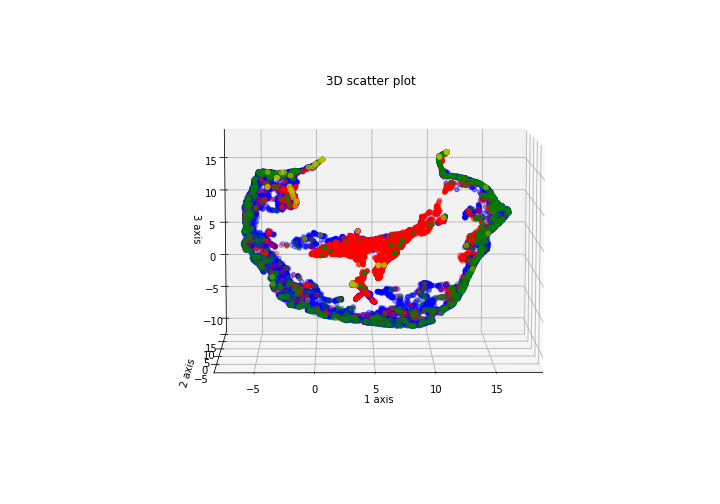

In [65]:
# n_neighbors=30, n_components=3, min_dist=0.0, spread = 2.0, metric='euclidean'

fig2 = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d")

ax.scatter3D(embedded[:, 0], embedded[:, 1], embedded[:, 2], color = color_info["color"])
plt.title(" 3D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
ax.set_zlabel('3 axis')
plt.show()